Basic Auto-Encoder.

Optimized via Mean Square Error Loss and Adam optimizer.

It has the form:

`AutoEnc(
  (Encoder): Sequential(
    (0): INPUT_LAYER to H_DIM_LAYER
    (1): ReLU()
    (2): H_DIM_LAYERT to Z_DIM_LAYER
    (3): ReLU()
    (4): Dropout(p=0.0)
  )
  (Decoder): Sequential(
    (0): Z_DIM_LAYER to H_DIM_LAYET
    (1): ReLU()
    (2): H_DIM_LAYERT to INPUT_LAYER
  )
)
`

In [17]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import MinMaxScaler
from common.autoenc import AutoEnc

data_path = os.path.expanduser('~/MNIST')
scaler = MinMaxScaler()
mnist = fetch_mldata('MNIST original', data_home=data_path)

X_idx = np.random.randint(
    low=0,
    high=mnist['data'].shape[0], 
    size=5000)

X = scaler.fit_transform(mnist['data'][X_idx].astype(float))
y = mnist['target'][X_idx]

X.shape

(5000, 784)

Fit the model, this might take several minutes

In [33]:
start_training = time.time()
ae = AutoEnc(
    mb_size=32,
    z_dim=10,
    h_dim=256,
    lr=.001,
    train_size=.9,
    epochs=70,
    p_dropout=.1,
    weight_decay=0e-8,
    verbose=True)

ae.fit(X)
end_training = time.time()
print('Elapsed Time:', end_training - start_training)

[1] train 0.057731438348902035 (4500)	[1] test 0.057034387020394206 (500)	
[2] train 0.04955812300562013 (4500)	[2] test 0.04955276218242943 (500)	
[3] train 0.043629611981041885 (4500)	[3] test 0.04401446506381035 (500)	
[4] train 0.04121738098931651 (4500)	[4] test 0.041821871884167194 (500)	
[5] train 0.03977686125811533 (4500)	[5] test 0.04006376280449331 (500)	
[6] train 0.03900168793843993 (4500)	[6] test 0.03969268570654094 (500)	
[7] train 0.03794393899804312 (4500)	[7] test 0.038816902320832014 (500)	
[8] train 0.03717412897352631 (4500)	[8] test 0.038202285300940275 (500)	
[9] train 0.03695589113742747 (4500)	[9] test 0.03784158988855779 (500)	
[10] train 0.03639963777828301 (4500)	[10] test 0.037277278723195195 (500)	
[11] train 0.035782294215779775 (4500)	[11] test 0.03690415853634477 (500)	
[12] train 0.035558934620720274 (4500)	[12] test 0.03662025020457804 (500)	
[13] train 0.03569800176836075 (4500)	[13] test 0.03688646841328591 (500)	
[14] train 0.03508367944271006 (45

Plot loss

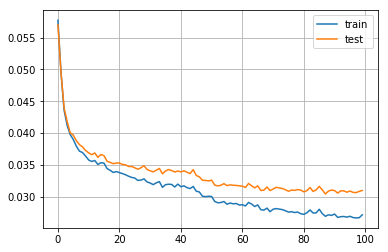

In [35]:
pd.DataFrame(ae.losses).plot(grid=True);

It is feasible to train more epochs using the `iterate_n_epochs()` method.
Furthermore, parameters are allowed to be modified:

In [36]:
ae.verbose = True
ae.mb_size = 128
ae.lr = .0005
ae.iterate_n_epochs(10)

[101] train 0.026215066926346883 (4500)	[101] test 0.03032456897199154 (500)	
[102] train 0.026130942524307303 (4500)	[102] test 0.03040031297132373 (500)	
[103] train 0.02596480440762308 (4500)	[103] test 0.030183135997503996 (500)	
[104] train 0.026042063824004598 (4500)	[104] test 0.03027008380740881 (500)	
[105] train 0.025729023282312684 (4500)	[105] test 0.030019334983080626 (500)	
[106] train 0.026189187231163185 (4500)	[106] test 0.030320120509713888 (500)	
[107] train 0.026005652991847858 (4500)	[107] test 0.0304105244576931 (500)	
[108] train 0.02591272293486529 (4500)	[108] test 0.03020756784826517 (500)	
[109] train 0.025852332046876352 (4500)	[109] test 0.030179668683558702 (500)	
[110] train 0.025804719008091424 (4500)	[110] test 0.030168890953063965 (500)	


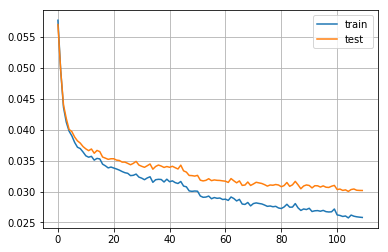

In [37]:
pd.DataFrame(ae.losses).plot(grid=True);

Sample some digits

In [38]:
sample_size = 16
sample_idx = np.random.randint(low=0, high=X.shape[0], size=sample_size)
X_sample = X[sample_idx]
labels = y[sample_idx]

Reduce dimensionality

In [39]:
Z_sample = ae.transform(X_sample)
Z_sample.shape

(16, 10)

Reconstruct from low dimensionality

In [40]:
X_sample_reconstructed = ae.inverse_transform(Z_sample)
X_sample_reconstructed.shape

(16, 784)

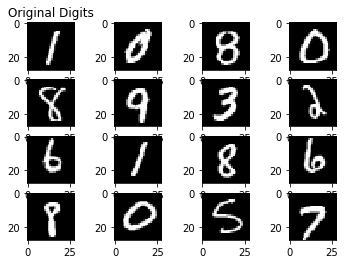

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4)
ax = ax.flatten()

for it, x in enumerate(X_sample):
    ax[it].imshow(x.reshape(28, 28), cmap='gray')
ax[0].set_title('Original Digits');

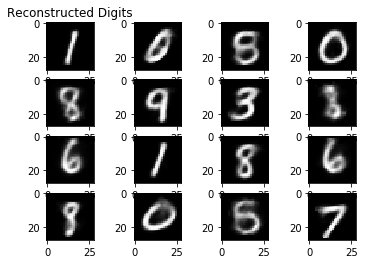

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4)
ax = ax.flatten()

for it, x in enumerate(X_sample_reconstructed):
    ax[it].imshow(x.reshape(28, 28), cmap='gray')
ax[0].set_title('Reconstructed Digits');